<div style="text-align: right"> 29.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#define constants
l = 1
g = 9.81

N = 3000
dt = 0.002

#starting angle and angular velocity
phi = np.pi/4
w = 0

#declare arrays for time and phi
t = np.arange(0,N*dt,dt)
phi_t = []

#numerical integration
for i in range(N):
    phi_t.append(phi)
    phi = phi + w * dt
    w = w - g/l * np.sin(phi) * dt

#convert phi to numpy array
phi_t = np.array(phi_t)

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


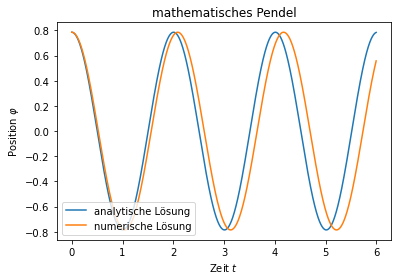

In [2]:
#calculate analytical solution
phi_0 = np.pi/4
phi_ta = phi_0 * np.cos(np.sqrt(g/l)*t)



fig, ax = plt.subplots()


#plot solutions
ax.set_title("mathematisches Pendel")  # Titel
ax.plot(t, phi_ta, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.plot(t, phi_t, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $\\varphi$")

plt.legend(loc=3)
plt.show()

Mir fällt beim Vergleich auf: Während beide Lösungen am Anfang noch gut übereinstimmen, kommt es zu einer immer größer werdenden Phasenverschiebung mit fortschreitender Zeit.

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

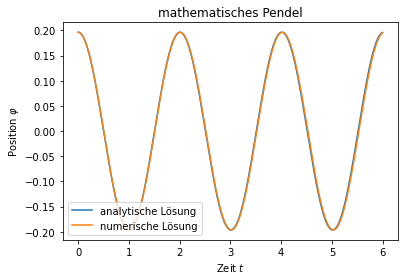

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#define constants
l = 1
g = 9.81

N = 3000
dt = 0.002

#starting angle and angular velocity
phi = np.pi/16
w = 0

#declare arrays for time and phi
t = np.arange(0,N*dt,dt)
phi_t = []

#numerical integration
for i in range(N):
    phi_t.append(phi)
    phi = phi + w * dt
    w = w - g/l * np.sin(phi) * dt

#convert phi to numpy array
phi_t = np.array(phi_t)



#calculate analytical solution
phi_0 = np.pi/16
phi_ta = phi_0 * np.cos(np.sqrt(g/l)*t)



fig, ax = plt.subplots()


#plot solutions
ax.set_title("mathematisches Pendel")  # Titel
ax.plot(t, phi_ta, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.plot(t, phi_t, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $\\varphi$")

plt.legend(loc=3)
plt.show()




Ich beobachte: Durch eine kleinere Amplitude stimmen numerische und analytische Lösung auch für größere Zeitpunkte besser überein. Es liegt eine deutlich kleinere Phasenverschiebung vor. Das liegt vermutlich daran, dass die Kleinwinkelnäherung bei der analytischen Lösung für kleinere Winkel genauer ist.